# Importing importent libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import datetime

# Loading Dataset

In [19]:
df=pd.read_excel('/content/1 cattle_dataset.xlsx')
df.head()

,body_temperature,breed_type,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,faecal_consistency,health_status
0,38.2,Cross Breed,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,extremely firm,unhealthy
1,38.9,Normal Breed,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,ideal,healthy
2,38.6,Cross Breed,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,ideal,healthy
3,39.5,Normal Breed,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,Black faece,unhealthy
4,39.7,Normal Breed,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,ideal,healthy


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Pre-Processsing

In [21]:
df.dtypes

body_temperature        float64
breed_type               object
milk_production         float64
respiratory_rate          int64
walking_capacity          int64
sleeping_duration       float64
body_condition_score      int64
heart_rate                int64
eating_duration         float64
lying_down_duration     float64
ruminating              float64
rumen_fill                int64
faecal_consistency       object
health_status            object
dtype: object

Here in df.dtypes we can see there are 3 object value. our model will not be able to train or test the object values, that's why we have to label these 3 values with Label Encoding.

# Label Encoding

Doing Label Encoding for "breed_type".

In [22]:
df["breed_type"].value_counts()

Cross Breed     90
Normal Breed    88
Name: breed_type, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label1 = label_encoder.fit_transform(df.breed_type)
df['BreedType_binary'] = label1
df.head()

,body_temperature,breed_type,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,faecal_consistency,health_status,BreedType_binary
0,38.2,Cross Breed,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,extremely firm,unhealthy,0
1,38.9,Normal Breed,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,ideal,healthy,1
2,38.6,Cross Breed,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,ideal,healthy,0
3,39.5,Normal Breed,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,Black faece,unhealthy,1
4,39.7,Normal Breed,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,ideal,healthy,1


In [24]:
df["BreedType_binary"].value_counts()

0    90
1    88
Name: BreedType_binary, dtype: int64

In [25]:
df1 = df.drop('breed_type',axis =1)
df1.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,faecal_consistency,health_status,BreedType_binary
0,38.2,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,extremely firm,unhealthy,0
1,38.9,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,ideal,healthy,1
2,38.6,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,ideal,healthy,0
3,39.5,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,Black faece,unhealthy,1
4,39.7,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,ideal,healthy,1


Doing Label Encoding for "faecal_consistency".

In [26]:
df1["faecal_consistency"].value_counts()

ideal                    90
extremely firm           24
Black faeces             22
Fresh blood in faeces    20
very liquid faeces       20
Black faece               2
Name: faecal_consistency, dtype: int64

In [27]:
label_encoder1=LabelEncoder()
label2 = label_encoder1.fit_transform(df.faecal_consistency)
df1['FaecalConsistency_binary'] = label2
df1.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,faecal_consistency,health_status,BreedType_binary,FaecalConsistency_binary
0,38.2,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,extremely firm,unhealthy,0,3
1,38.9,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,ideal,healthy,1,4
2,38.6,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,ideal,healthy,0,4
3,39.5,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,Black faece,unhealthy,1,0
4,39.7,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,ideal,healthy,1,4


In [28]:
df2 = df1.drop('faecal_consistency',axis =1)
df2.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,health_status,BreedType_binary,FaecalConsistency_binary
0,38.2,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,unhealthy,0,3
1,38.9,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,healthy,1,4
2,38.6,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,healthy,0,4
3,39.5,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,unhealthy,1,0
4,39.7,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,healthy,1,4


In [29]:
df2['FaecalConsistency_binary'].value_counts()

4    90
3    24
1    22
2    20
5    20
0     2
Name: FaecalConsistency_binary, dtype: int64

Doing Label Encoding for "health_status" (Target).

In [30]:
df2['health_status'].value_counts()

healthy      90
unhealthy    88
Name: health_status, dtype: int64

In [31]:
label_encoder2=LabelEncoder()
label3 = label_encoder2.fit_transform(df.health_status)
df2['Target'] = label3
df2.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,health_status,BreedType_binary,FaecalConsistency_binary,Target
0,38.2,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,unhealthy,0,3,1
1,38.9,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,healthy,1,4,0
2,38.6,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,healthy,0,4,0
3,39.5,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,unhealthy,1,0,1
4,39.7,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,healthy,1,4,0


In [32]:
df3 = df2.drop('health_status',axis =1)
df3.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,BreedType_binary,FaecalConsistency_binary,Target
0,38.2,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,0,3,1
1,38.9,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,1,4,0
2,38.6,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,0,4,0
3,39.5,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,1,0,1
4,39.7,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,1,4,0


In [33]:
df3['Target'].value_counts()

0    90
1    88
Name: Target, dtype: int64

Those 3 object has been Labelled, Now you can see our new data types below.

In [34]:
df3.dtypes

body_temperature            float64
milk_production             float64
respiratory_rate              int64
walking_capacity              int64
sleeping_duration           float64
body_condition_score          int64
heart_rate                    int64
eating_duration             float64
lying_down_duration         float64
ruminating                  float64
rumen_fill                    int64
BreedType_binary              int64
FaecalConsistency_binary      int64
Target                        int64
dtype: object

In [35]:
df3.describe()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,BreedType_binary,FaecalConsistency_binary,Target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,39.011236,14.770787,28.685393,9303.179775,4.934831,2.910112,53.955056,2.825843,13.957303,4.888764,2.741573,0.494382,3.337079,0.494382
std,0.872225,6.615735,9.768617,3237.390592,1.559668,1.254510,13.157808,0.760542,1.512650,1.173477,1.047225,0.501379,1.248220,0.501379
min,35.500000,5.100000,14.000000,5004.000000,2.800000,1.000000,37.000000,1.300000,6.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,38.300000,9.700000,21.000000,6019.000000,3.500000,2.000000,42.000000,2.200000,12.900000,3.600000,2.000000,0.000000,3.000000,0.000000
50%,38.900000,13.600000,28.000000,11203.000000,4.200000,3.000000,50.000000,2.900000,13.800000,5.000000,3.000000,0.000000,4.000000,0.000000
75%,39.700000,21.200000,36.000000,12291.000000,6.500000,4.000000,63.000000,3.400000,15.100000,5.900000,3.000000,1.000000,4.000000,1.000000
max,40.600000,26.500000,49.000000,13257.000000,7.200000,5.000000,83.000000,4.900000,16.400000,7.000000,5.000000,1.000000,5.000000,1.000000


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   body_temperature          178 non-null    float64
 1   milk_production           178 non-null    float64
 2   respiratory_rate          178 non-null    int64  
 3   walking_capacity          178 non-null    int64  
 4   sleeping_duration         178 non-null    float64
 5   body_condition_score      178 non-null    int64  
 6   heart_rate                178 non-null    int64  
 7   eating_duration           178 non-null    float64
 8   lying_down_duration       178 non-null    float64
 9   ruminating                178 non-null    float64
 10  rumen_fill                178 non-null    int64  
 11  BreedType_binary          178 non-null    int64  
 12  FaecalConsistency_binary  178 non-null    int64  
 13  Target                    178 non-null    int64  
dtypes: float64

In [37]:
df3.shape

(178, 14)

In [38]:
df3.columns

Index(['body_temperature', 'milk_production', 'respiratory_rate',
       'walking_capacity', 'sleeping_duration', 'body_condition_score',
       'heart_rate', 'eating_duration', 'lying_down_duration', 'ruminating',
       'rumen_fill', 'BreedType_binary', 'FaecalConsistency_binary', 'Target'],
      dtype='object')

In [39]:
df3.value_counts

<bound method DataFrame.value_counts of      body_temperature  milk_production  respiratory_rate  walking_capacity  \
0                38.2             13.6                36             12432   
1                38.9             24.1                37             11987   
2                38.6             14.7                42             13121   
3                39.5             26.2                29             12055   
4                39.7             22.5                48             10352   
..                ...              ...               ...               ...   
173              39.9              6.8                28              6942   
174              40.2              7.2                20              6652   
175              39.8              7.7                16              6705   
176              39.5              5.7                21              6272   
177              39.6              5.1                20              5289   

     sleeping_duration  body_condition_score  heart_rate  eating_duration  \
0                  3.5                     3          50              3.2   
1                  4.2                     2          62              3.9   
2                  3.2                     3          71              3.0   
3                  3.8                     4          68              3.6   
4                  4.6                     2          63              3.1   
..                 ...                   ...         ...              ...   
173                7.1                     4          47              1.9   
174                6.5                     4          41              2.0   
175                6.6                     3          37              2.6   
176                6.8                     3          45              2.2   
177                6.1                     1          42              1.6   

     lying_down_duration  ruminating  rumen_fill  BreedType_binary  \
0                   15.0         6.0           3                 0   
1                   12.2         5.8           4                 1   
2                   12.6         5.9           2                 0   
3                   13.5         6.0           2                 1   
4                   13.5         6.3           5                 1   
..                   ...         ...         ...               ...   
173                 15.0         3.1           3                 0   
174                 15.5         3.6           4                 0   
175                 14.8         4.2           3                 0   
176                 15.0         3.1           2                 0   
177                 16.3         3.0           1                 0   

     FaecalConsistency_binary  Target  
0                           3       1  
1                           4       0  
2                           4       0  
3                           0       1  
4                           4       0  
..                        ...     ...  
173                         2       1  
174                         1       1  
175                         3       1  
176                         5       1  
177                         5       1  

[178 rows x 14 columns]>

In [40]:
df3.isnull().sum()

body_temperature            0
milk_production             0
respiratory_rate            0
walking_capacity            0
sleeping_duration           0
body_condition_score        0
heart_rate                  0
eating_duration             0
lying_down_duration         0
ruminating                  0
rumen_fill                  0
BreedType_binary            0
FaecalConsistency_binary    0
Target                      0
dtype: int64

In [41]:
df3.corr()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,BreedType_binary,FaecalConsistency_binary,Target
body_temperature,1.000000,-0.532016,-0.654837,-0.863091,0.846930,0.051528,-0.673595,-0.586734,0.529380,-0.714028,-0.103190,-0.033444,-0.540070,0.863141
milk_production,-0.532016,1.000000,0.461387,0.591656,-0.563167,0.056455,0.469623,0.487629,-0.420655,0.567665,0.197390,0.767783,0.198237,-0.565875
respiratory_rate,-0.654837,0.461387,1.000000,0.780026,-0.786079,-0.065019,0.754336,0.534784,-0.469898,0.664453,0.144435,0.027322,0.389614,-0.789375
walking_capacity,-0.863091,0.591656,0.780026,1.000000,-0.960689,0.017426,0.797378,0.740806,-0.624619,0.862644,0.188139,0.009322,0.469702,-0.934301
sleeping_duration,0.846930,-0.563167,-0.786079,-0.960689,1.000000,0.036837,-0.817243,-0.701481,0.602046,-0.843306,-0.111373,-0.000471,-0.470972,0.914195
body_condition_score,0.051528,0.056455,-0.065019,0.017426,0.036837,1.000000,-0.053640,0.505773,-0.042524,0.227273,0.584280,-0.054701,-0.045485,0.017157
heart_rate,-0.673595,0.469623,0.754336,0.797378,-0.817243,-0.053640,1.000000,0.567851,-0.482149,0.673379,0.054095,0.015377,0.374506,-0.784502
eating_duration,-0.586734,0.487629,0.534784,0.740806,-0.701481,0.505773,0.567851,1.000000,-0.535409,0.827200,0.463838,-0.033694,0.320475,-0.688571
lying_down_duration,0.529380,-0.420655,-0.469898,-0.624619,0.602046,-0.042524,-0.482149,-0.535409,1.000000,-0.577192,-0.118281,-0.047994,-0.299339,0.617984
ruminating,-0.714028,0.567665,0.664453,0.862644,-0.843306,0.227273,0.673379,0.827200,-0.577192,1.000000,0.347026,0.007574,0.411453,-0.818244


# Ploting Graphs

<Axes: >

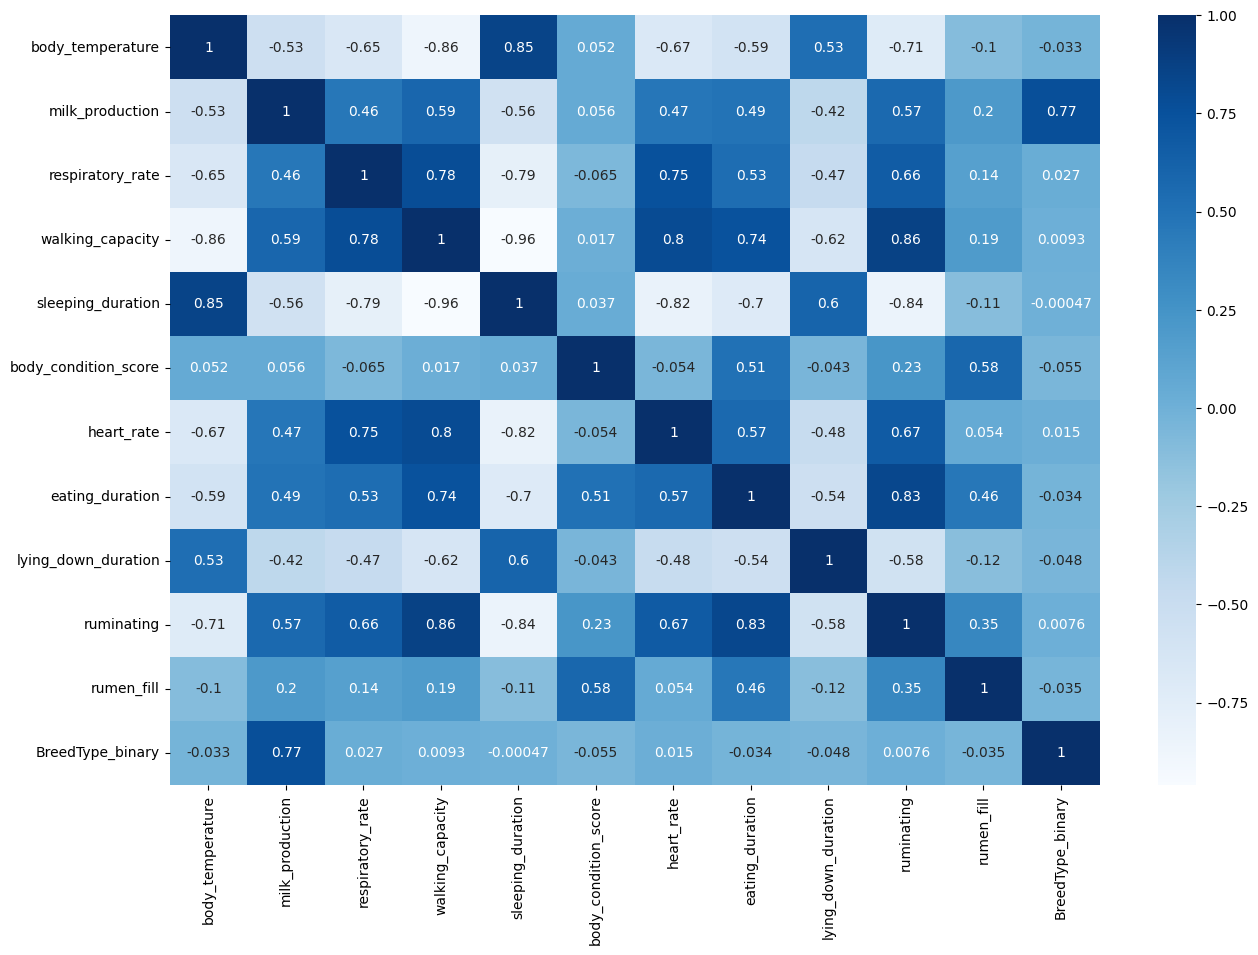

In [42]:
# plotting heatmap using seaborn.

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True,cmap ="Blues")

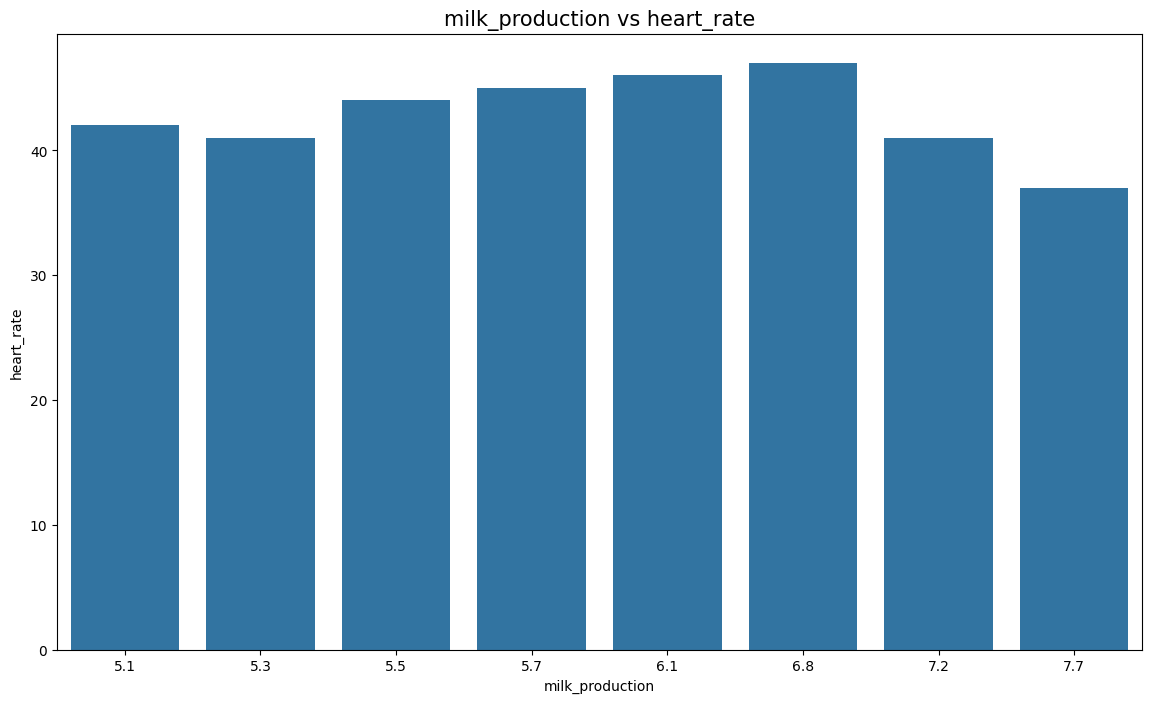

In [43]:
plt.figure(figsize=(14,8))
sns.barplot(x="milk_production", y="heart_rate", data=df[170:180])
plt.title("milk_production vs heart_rate",fontsize=15)
plt.xlabel("milk_production")
plt.ylabel("heart_rate")
plt.show()
plt.style.use("ggplot")

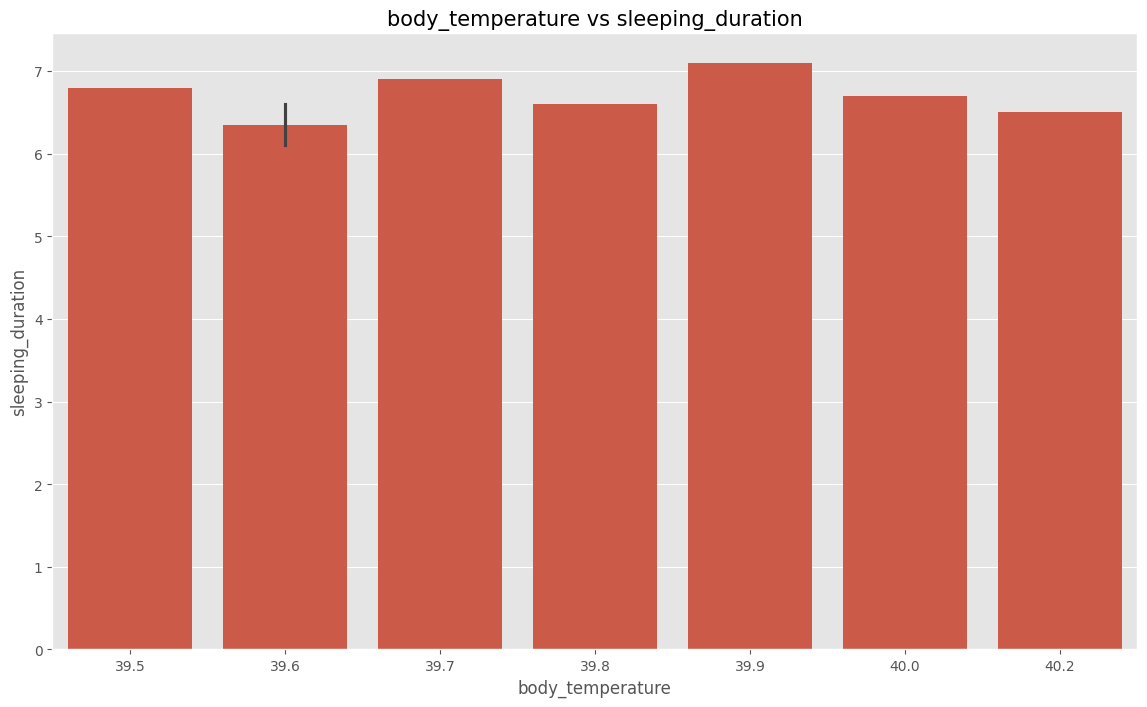

In [44]:
plt.figure(figsize=(14,8))
sns.barplot(x="body_temperature", y="sleeping_duration", data=df[170:190])
plt.title("body_temperature vs sleeping_duration",fontsize=15)
plt.xlabel("body_temperature")
plt.ylabel("sleeping_duration")
plt.show()
plt.style.use("ggplot")

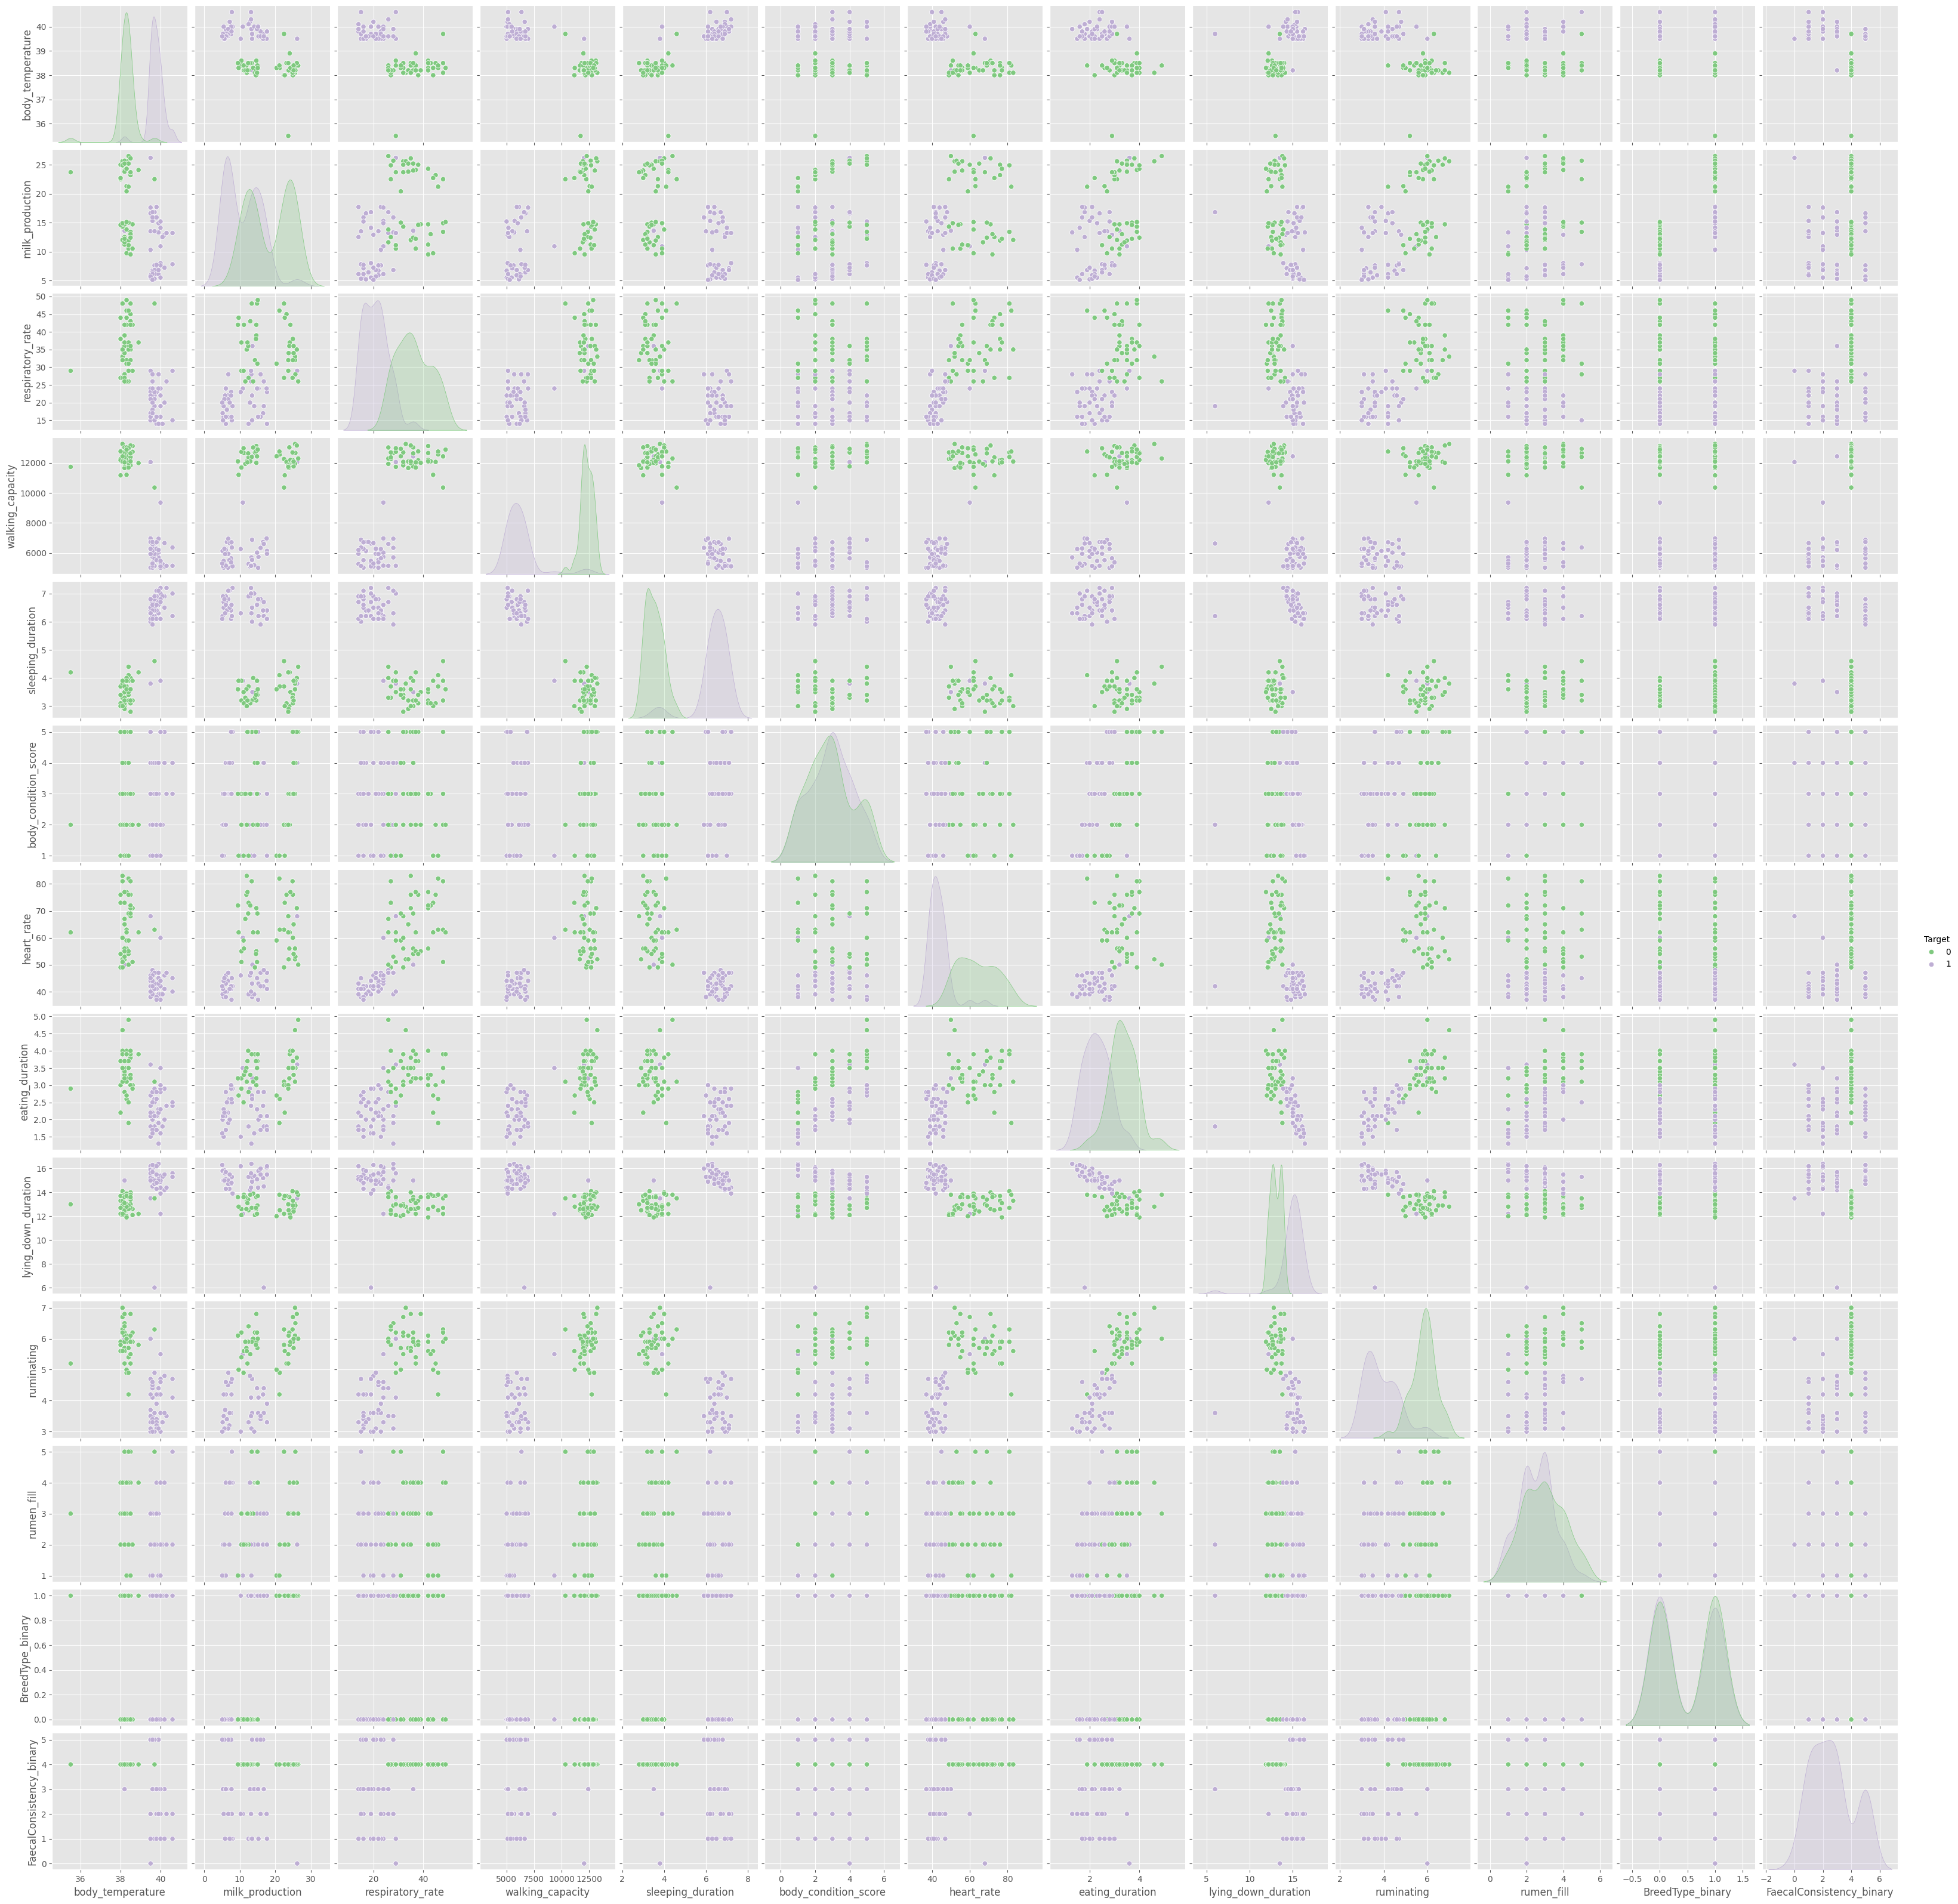

In [45]:

sns.pairplot(df3,hue = 'Target', palette='Accent')

<Axes: xlabel='milk_production', ylabel='heart_rate'>

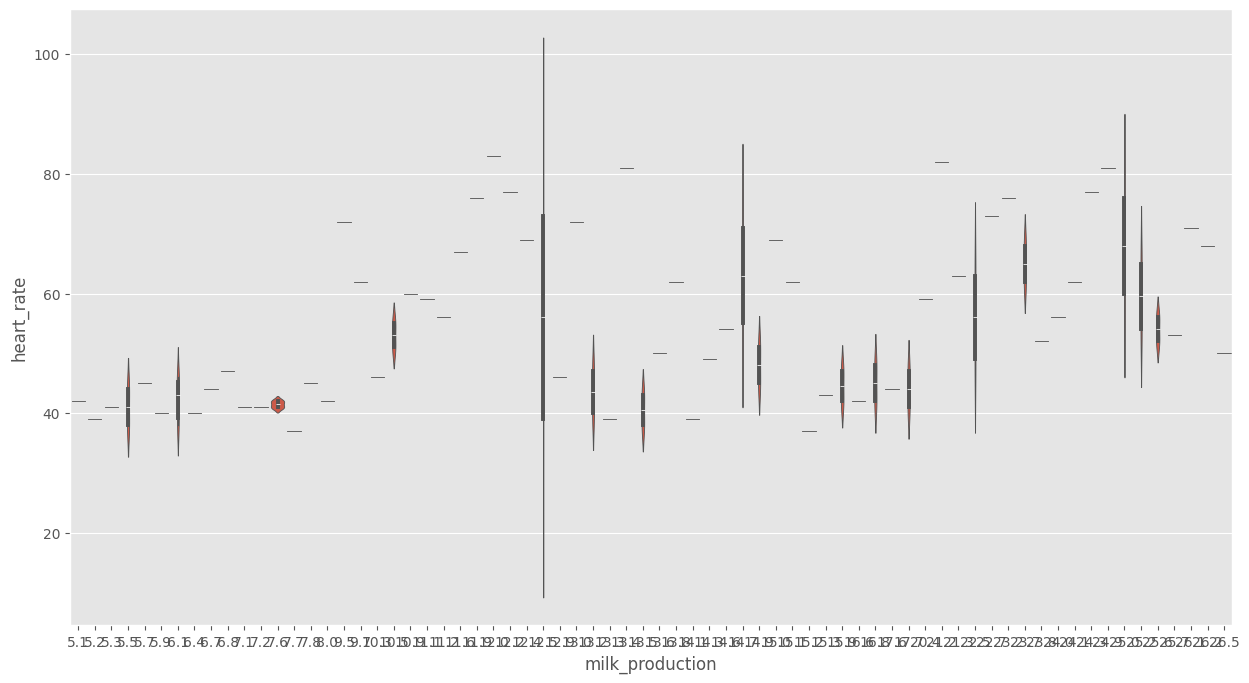

In [46]:
plt.figure(figsize=(15,8))
sns.violinplot(x="milk_production",y="heart_rate",data=df3)

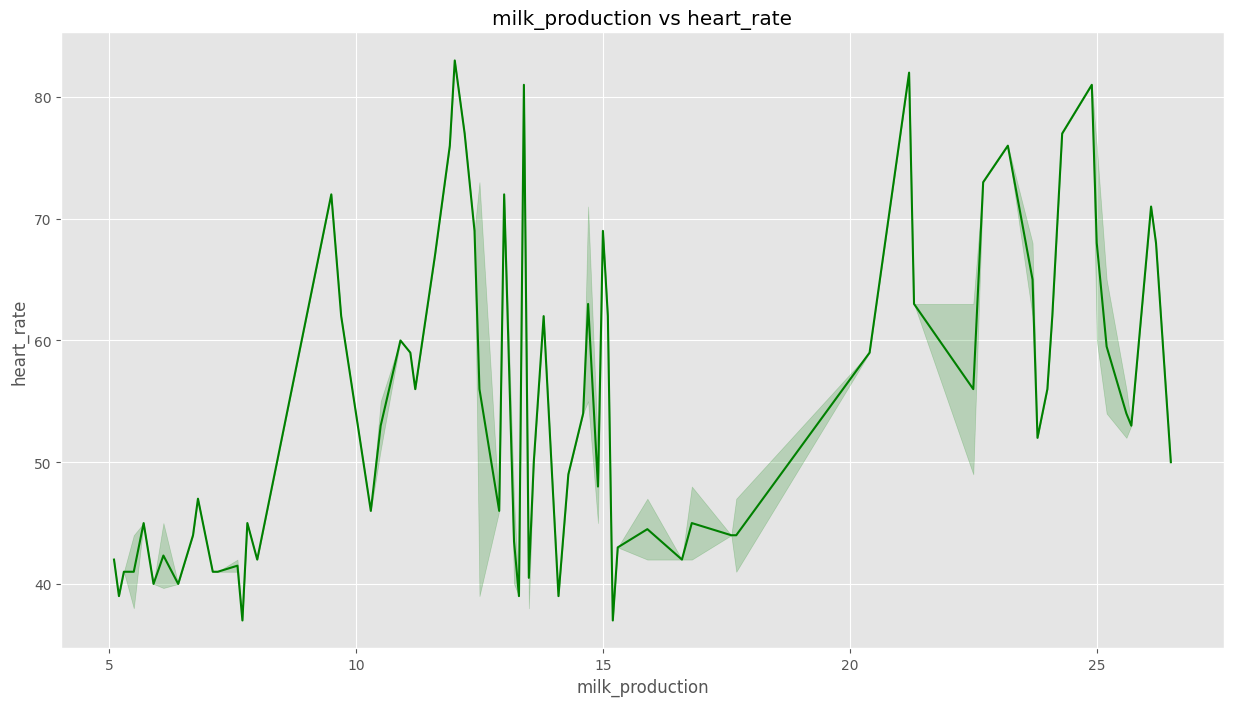

In [47]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "milk_production",y = "heart_rate",data = df[0:400], color='green')
plt.title("milk_production vs heart_rate")
plt.xlabel("milk_production")
plt.ylabel("heart_rate")
plt.show()

The seaborn.mpl_palette() function can visualize the discrete values by generating a discrete palette.

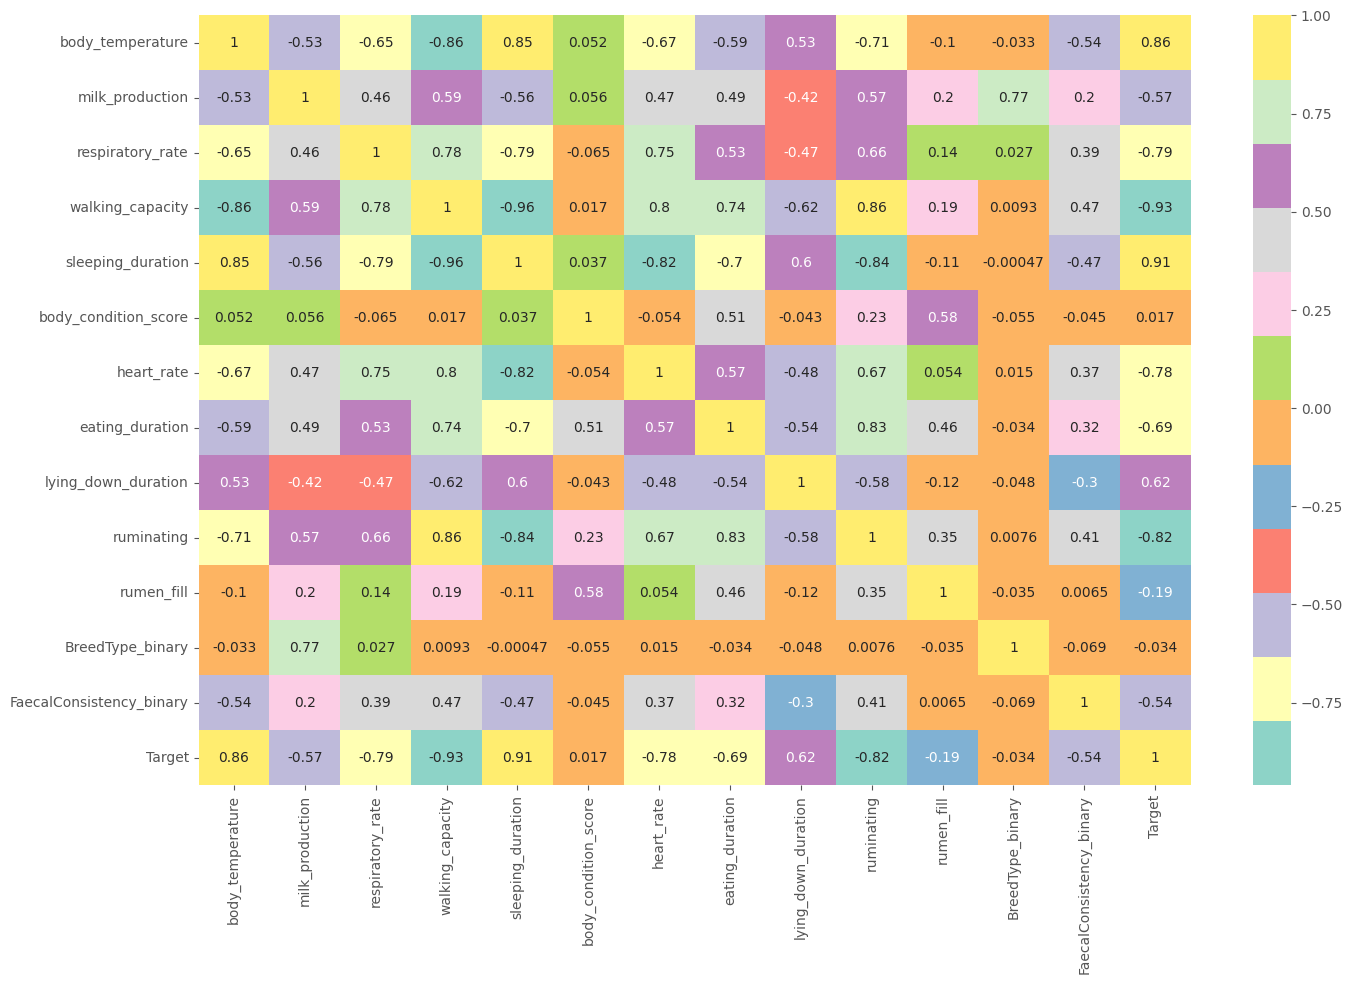

In [48]:
plt.figure(figsize=(16,10))
#Set3: Name of the color palette
cmap = sns.mpl_palette('Set3', 20)
map = sns.heatmap(df3.corr(), annot=True, cmap=cmap)

# Searching for Outliers and if find any then will remove them.

In [49]:
# Function to creat Diagonostic plots

def plotvariable (df3, variable):
    plt.figure(figsize=(16,4))

    #histogram

    plt.subplot(1,2,1)
    plt.hist(df3[variable], alpha=0.5)

    #boxplot

    plt.subplot(1,2,2)
    sns.boxplot(df3[variable])

    plt.show()


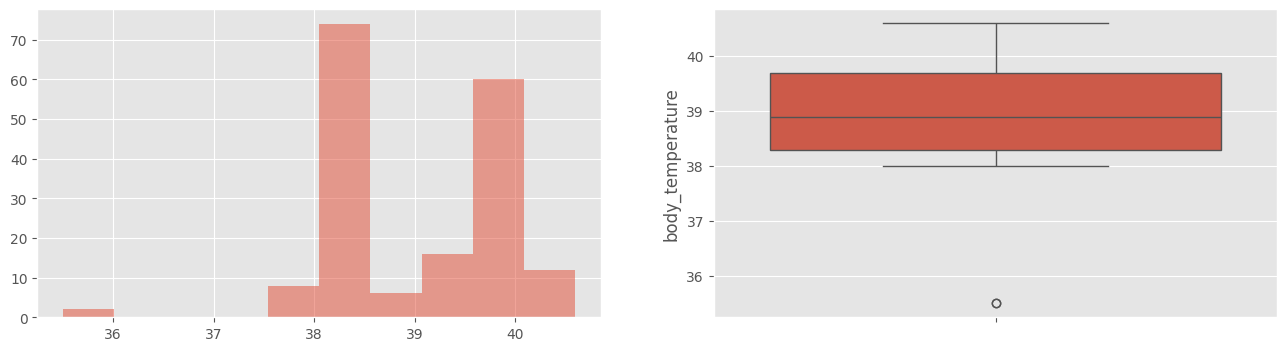

In [50]:
plotvariable(df3, "body_temperature")

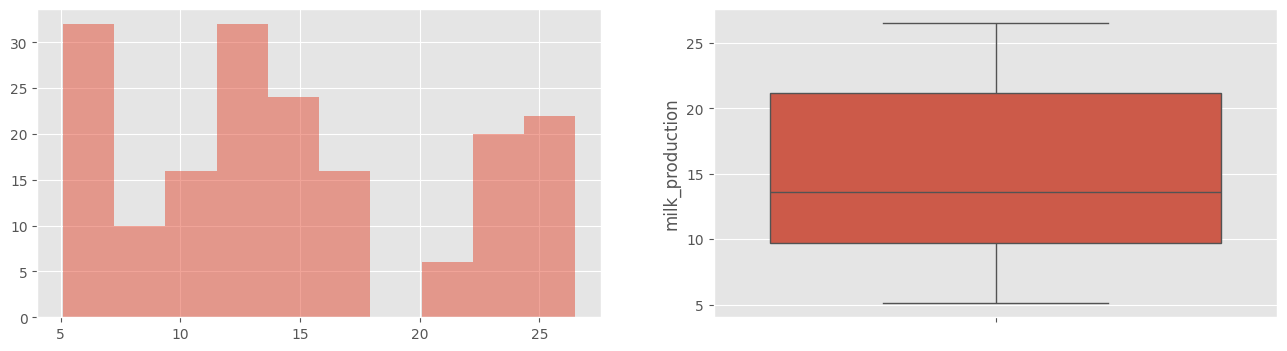

In [51]:
plotvariable(df3, "milk_production")

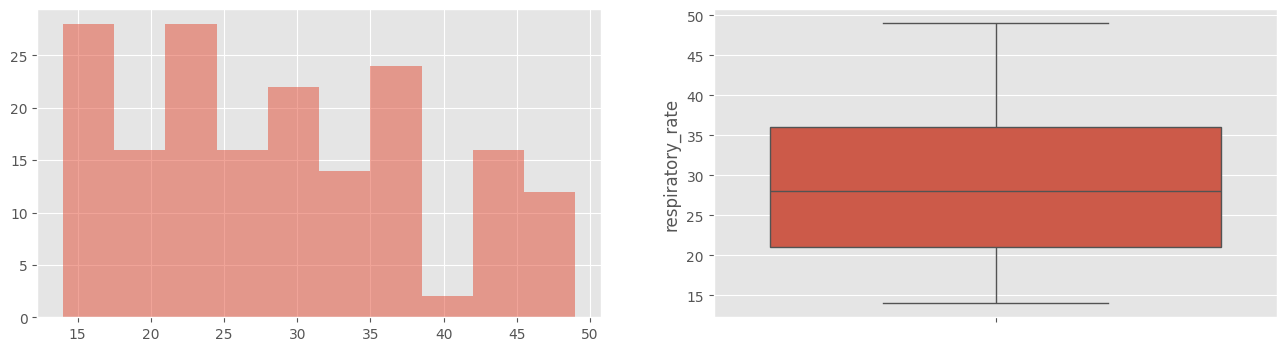

In [52]:
plotvariable(df3, "respiratory_rate")

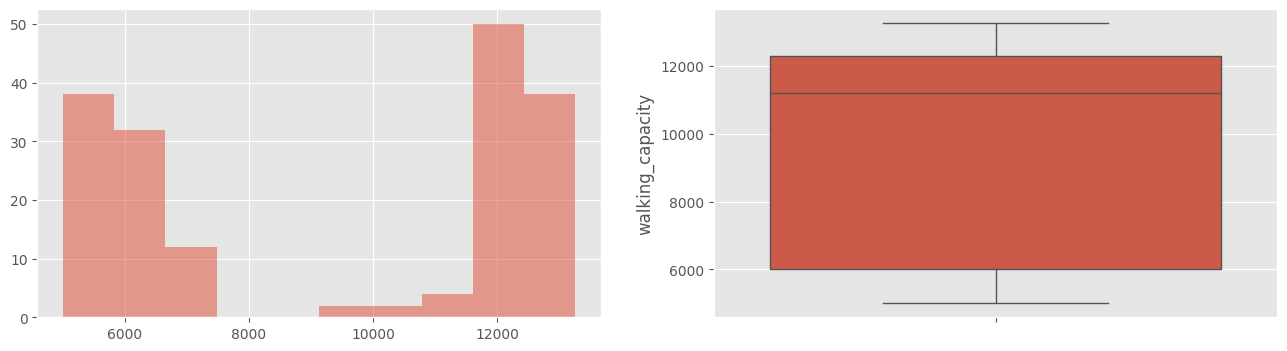

In [53]:
plotvariable(df3, "walking_capacity")

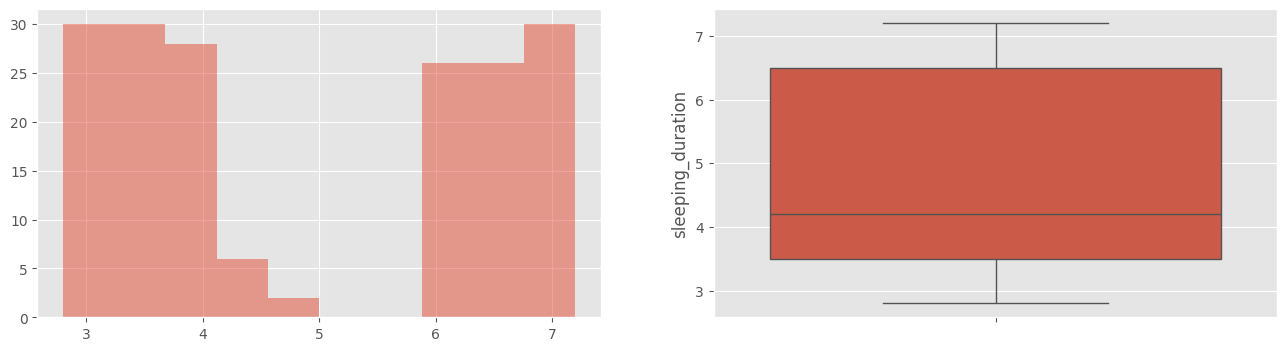

In [54]:
plotvariable(df3, "sleeping_duration")

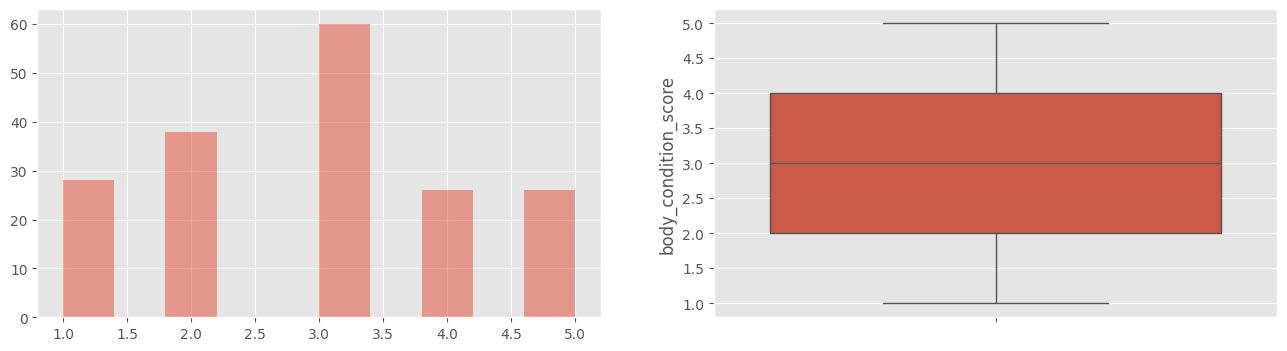

In [55]:
plotvariable(df3, "body_condition_score")

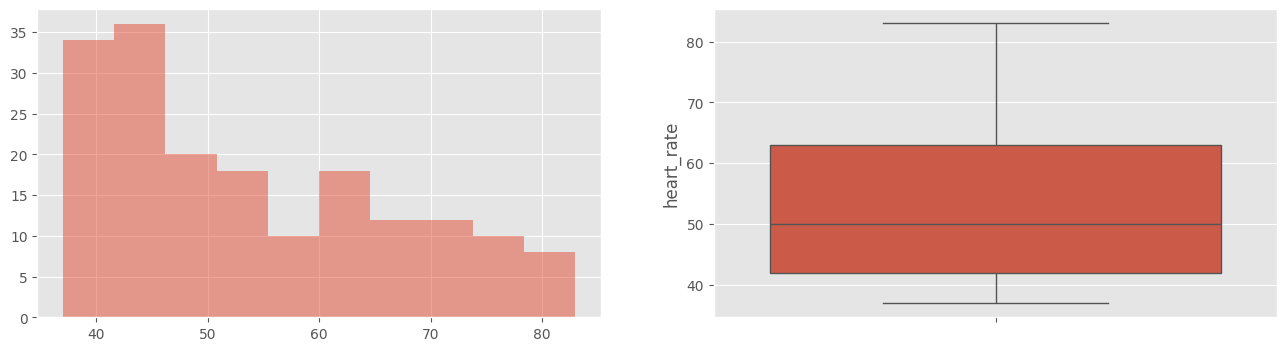

In [56]:
plotvariable(df3, "heart_rate")

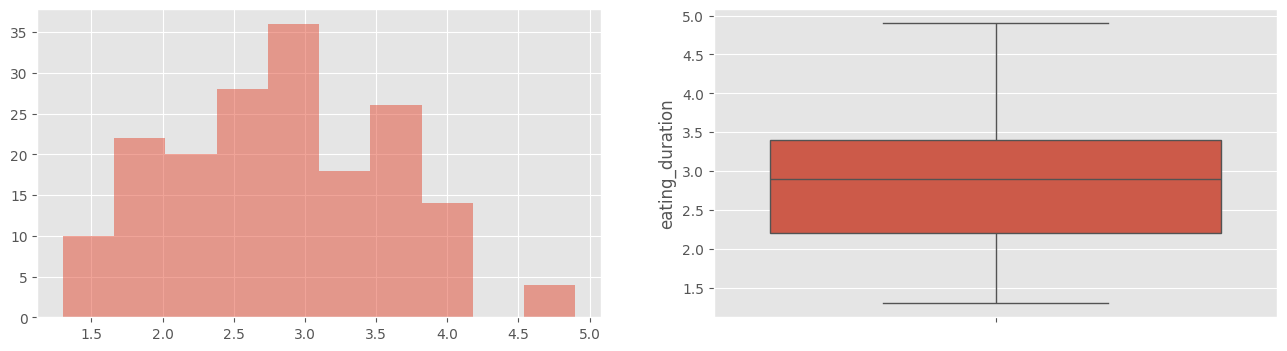

In [57]:
plotvariable(df3, "eating_duration")

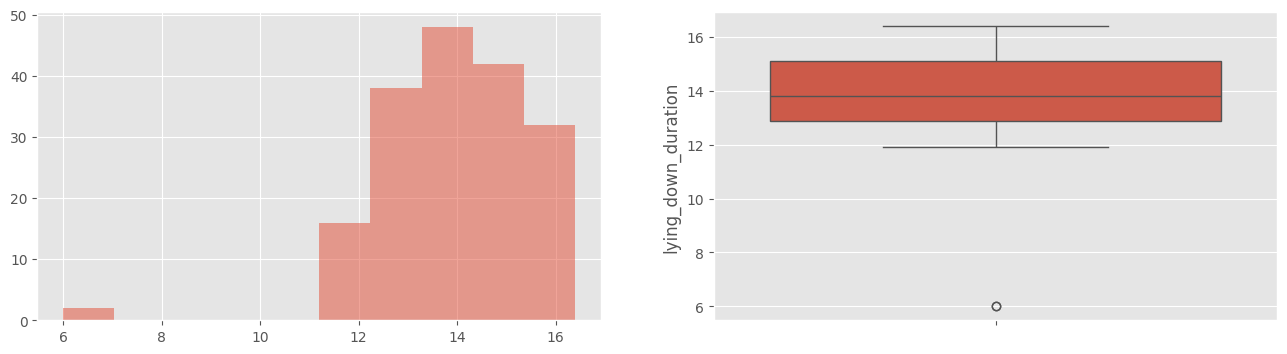

In [58]:
plotvariable(df3, "lying_down_duration")

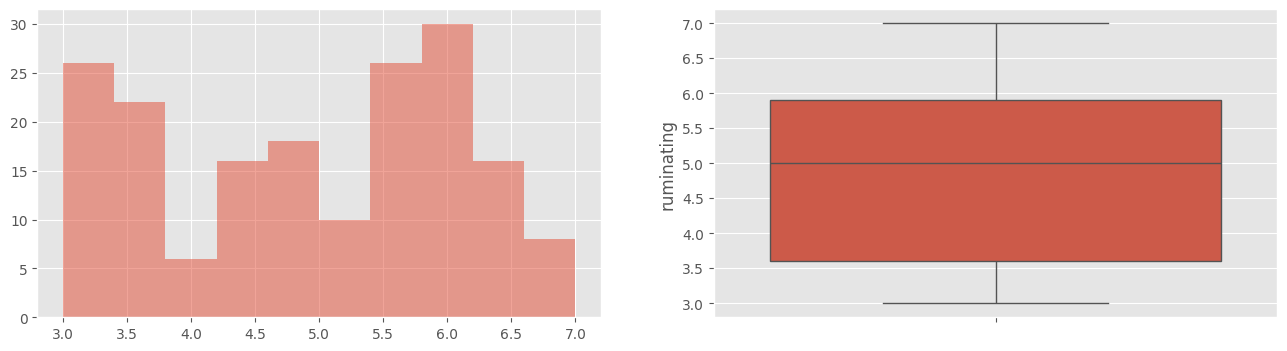

In [59]:
plotvariable(df3, "ruminating")

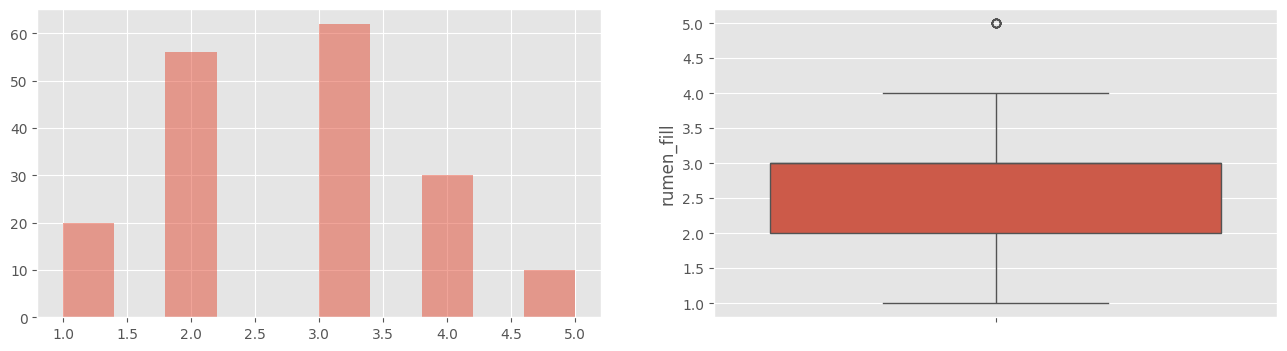

In [60]:
plotvariable(df3, "rumen_fill")

# After searching for outliers we can see there are little outliers in three features. "body_temperature" & "rumen_fill", "lying_down_duration".The amount of outliers is so little. it will not interupt in our model prediction but we will remove them.

In this we will follow the "IQR" approach to filter and deal with outliers. as we know that lower limit for any observation is (Q1- 1.5*IQR) and upper limit is (Q3 + 1.5*IQR)
these terms are as follow:


- Q1 = 25th percentile
- Q3 = 75th percentile
- IQR = Q3- Q1

In [61]:
def find_bounderies(df3, variables):
    Q1 = df3[variables].quantile(.25)
    Q3 = df3[variables].quantile(.75)
    IQR = Q3-Q1
    lower_boundry = Q1 - 1.5*IQR
    upper_boundry = Q3 + 1.5*IQR

    return lower_boundry, upper_boundry

# Removing Outliers for "rumen_fill"

In [62]:
lower_RumenFill, upper_RumenFill = find_bounderies(df3 , "rumen_fill")
print("upper limit for RumenFill is : " , upper_RumenFill)
print("lower limit for RomenFill is : " , lower_RumenFill)

upper limit for RumenFill is :  4.5
lower limit for RomenFill is :  0.5


In [63]:
outliers_rumenfill = np.where(df3["rumen_fill"] > upper_RumenFill, True,
                              np.where(df3["rumen_fill"] < lower_RumenFill, True,  False))

In [64]:
outliers_rumenfill

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [65]:
df3.shape

(178, 14)

In [66]:
df4 = df3.loc[~(outliers_rumenfill)]
df4.shape

(168, 14)

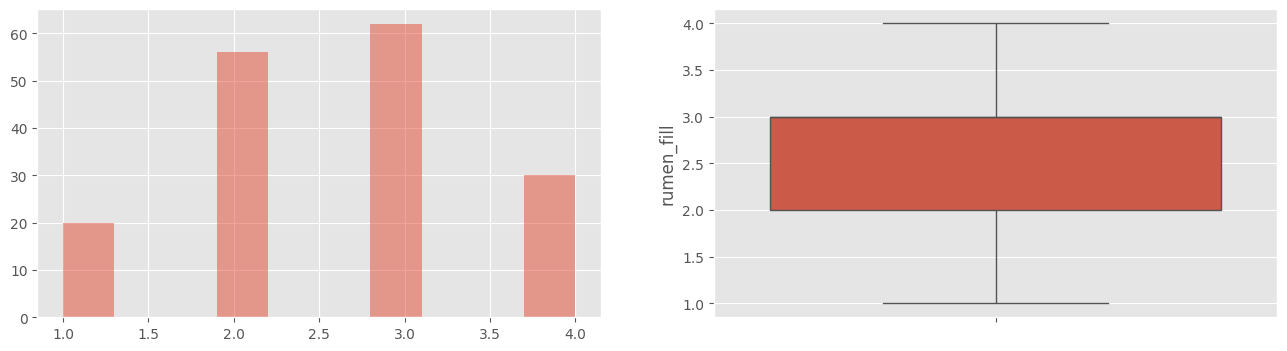

In [67]:
plotvariable(df4, "rumen_fill")

# Removing outliers from "body_temperature".

In [68]:
lower_body_temperature, upper_body_temperature = find_bounderies(df4 , "body_temperature")
print("upper limit for body_temperature is : " , upper_body_temperature)
print("lower limit for body_temperature is : " , lower_body_temperature)

upper limit for body_temperature is :  41.86250000000001
lower limit for body_temperature is :  36.162499999999994


In [69]:
outliers_body_temperature = np.where(df4["body_temperature"] > upper_body_temperature, True,
                              np.where(df4["body_temperature"] < lower_body_temperature, True,  False))

In [70]:
outliers_body_temperature

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [71]:
df4.shape

(168, 14)

In [72]:
df5 = df4.loc[~(outliers_body_temperature)]
df5.shape

(166, 14)

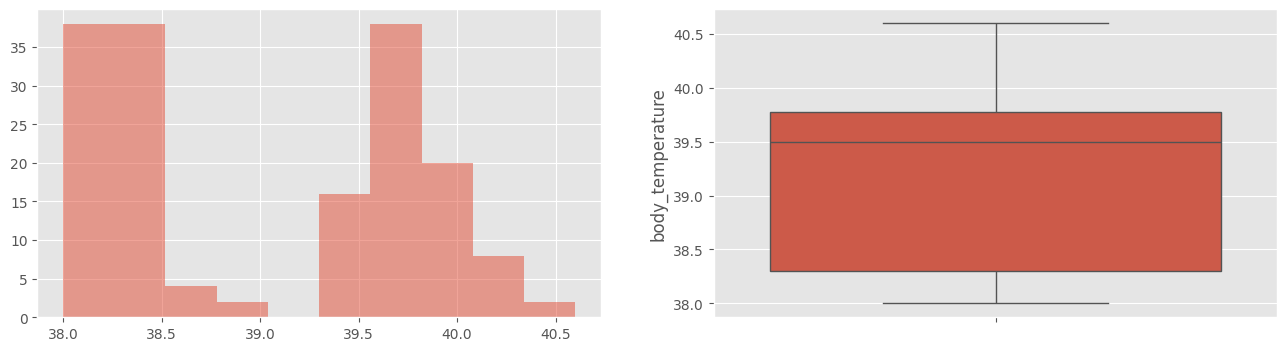

In [73]:
plotvariable(df5, "body_temperature")

# Removing outliers from "lying_down_duration".

In [74]:
lower_lying_down_duration, upper_lying_down_duration = find_bounderies(df5 , "lying_down_duration")
print("upper limit for lying_down_duration is : " , upper_lying_down_duration)
print("lower limit for lying_down_duration is : " , lower_lying_down_duration)

upper limit for lying_down_duration is :  18.362499999999997
lower limit for lying_down_duration is :  9.662500000000001


In [75]:
outliers_lying_down_duration = np.where(df5["lying_down_duration"] > upper_lying_down_duration, True,
                              np.where(df5["lying_down_duration"] < lower_lying_down_duration, True,  False))

In [76]:
outliers_lying_down_duration

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [77]:
df5.shape

(166, 14)

In [78]:
df6 = df5.loc[~(outliers_lying_down_duration)]

df6.shape

(164, 14)

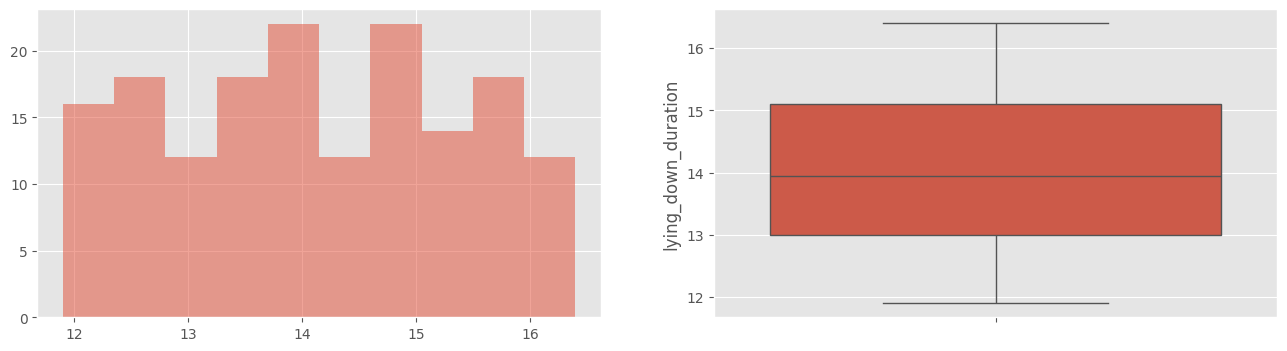

In [79]:
plotvariable(df6, "lying_down_duration")

After removing outliers from these three features, Now our data is outliers free.

# Splitting Training and Testing data.

In [80]:
x = df6.drop(columns = 'Target')
y = df6['Target']

In [81]:
x

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,BreedType_binary,FaecalConsistency_binary
0,38.2,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,0,3
1,38.9,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,1,4
2,38.6,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,0,4
3,39.5,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,1,0
5,40.0,10.9,24,9352,3.9,1,60,3.5,12.2,5.5,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,39.9,6.8,28,6942,7.1,4,47,1.9,15.0,3.1,3,0,2
174,40.2,7.2,20,6652,6.5,4,41,2.0,15.5,3.6,4,0,1
175,39.8,7.7,16,6705,6.6,3,37,2.6,14.8,4.2,3,0,3
176,39.5,5.7,21,6272,6.8,3,45,2.2,15.0,3.1,2,0,5


In [82]:
y

0      1
1      0
2      0
3      1
5      1
      ..
173    1
174    1
175    1
176    1
177    1
Name: Target, Length: 164, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

# Scaling the data with MinMaxScaler.

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train)
scaler.fit(x_test)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [85]:
x_train_scaled.max()

1.1363636363636402

In [86]:
x_train_scaled.min()

-0.06451612903225806

In [87]:
# the scaler stores the standard deviation of the featuring scale

scaler.scale_

array([4.54545455e-01, 4.73933649e-02, 2.94117647e-02, 1.21168060e-04,
       2.38095238e-01, 2.50000000e-01, 2.27272727e-02, 3.22580645e-01,
       2.32558140e-01, 2.50000000e-01, 3.33333333e-01, 1.00000000e+00,
       2.00000000e-01])

As all data are in array form. We will use pandas dataframe to convert them into dataframe.

In [88]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns=x_test.columns)

In [89]:
x_train_scaled.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,BreedType_binary,FaecalConsistency_binary
0,0.772727,0.094787,0.058824,0.061675,0.976190,0.50,0.090909,0.354839,0.534884,0.050,0.333333,0.0,0.4
1,0.727273,0.118483,0.264706,0.076699,0.809524,0.75,0.090909,0.451613,0.627907,0.150,0.666667,0.0,1.0
2,0.818182,0.080569,0.411765,0.234824,0.976190,0.75,0.227273,0.129032,0.697674,0.025,0.666667,0.0,0.4
3,0.681818,0.047393,0.294118,0.017327,0.857143,0.25,0.204545,0.064516,0.860465,0.400,0.000000,0.0,0.6
4,0.045455,0.289100,0.823529,0.926936,0.023810,0.50,0.431818,0.580645,0.418605,0.650,0.333333,0.0,0.8


In [90]:
np.round(x_train_scaled.describe(), 2)

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,BreedType_binary,FaecalConsistency_binary
count,131.00,131.00,131.00,131.00,131.00,131.00,131.00,131.00,131.00,131.00,131.00,131.00,131.00
mean,0.42,0.44,0.44,0.51,0.46,0.46,0.38,0.42,0.48,0.46,0.52,0.47,0.68
std,0.36,0.30,0.28,0.39,0.38,0.31,0.30,0.25,0.30,0.28,0.31,0.50,0.25
min,-0.05,0.00,0.00,0.00,-0.05,0.00,0.00,-0.06,-0.02,0.00,0.00,0.00,0.20
25%,0.09,0.21,0.24,0.11,0.10,0.25,0.11,0.23,0.20,0.18,0.33,0.00,0.60
50%,0.23,0.39,0.41,0.75,0.26,0.50,0.30,0.42,0.42,0.48,0.67,0.00,0.80
75%,0.75,0.60,0.65,0.87,0.85,0.75,0.59,0.58,0.72,0.73,0.67,1.00,0.80
max,1.14,1.01,1.03,1.00,1.00,1.00,1.05,1.10,1.02,1.00,1.00,1.00,1.00


# Building Model on Scaled Dataset.

# 1. Using LogisticRegression Model

In [91]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [92]:
y_pred=reg.predict(x_test_scaled)

In [93]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [94]:
y_test.head()

129    1
73     1
42     1
24     0
177    1
Name: Target, dtype: int64

Here we are using "classification_report" which we imported from "sklearn.metrics". A classification report is a performance evaluation metric in machine learning. It is used to show the "precision", "recall", "F1 Score", and "support" of your trained classification model.

![image.png](attachment:image.png)

In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix,r2_score

print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=(1,0)))
print("Training Score: ", reg.score(x_train_scaled, y_train)*100)

Precision:  1.0
Recall:  0.8095238095238095
f1_score:  0.8947368421052632
[[17  4]
 [ 0 12]]
Training Score:  100.0


In [96]:
reg_acc = accuracy_score(y_test, y_pred)*100
reg_acc

87.87878787878788

Precision Recall Curve for LogisticRegression

In [101]:
!pip install sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [97]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(reg, x_test_scaled, y_test , name = 'Logistic Regression')

ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [ ]:
y_predTrain = reg.predict(x_train_scaled)
reg_train_acc = accuracy_score(y_train, y_predTrain)*100
reg_train_acc

# plt.plot(trainAcc,'ro-', reg_acc, 'bv--')
# plt.legend(['Training Accuracy','Test Accuracy'])
# plt.xlabel('Max depth')
# plt.ylabel('Accuracy');

In [ ]:
df7 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df7.head()

In [ ]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression'],'Train_Accuracy':[reg_train_acc],'Test_Accuracy':[reg_acc]})
print(tempResults)

results= pd.DataFrame()
print(type(results))

results = pd.concat( [results, tempResults] )

results = results[['Algorithm', 'Train_Accuracy', 'Test_Accuracy']]
results

# Plotting Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):

    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
y_pred = reg.predict(x_train_scaled)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=reg.classes_, title='Training confusion')

Calculating AUC(Area Under Curve) of LogisticRegression Model.

In [ ]:
from sklearn import metrics

reg = LogisticRegression()
reg.fit(x_train_scaled,y_train)
y_pred=reg.predict(x_test_scaled)

auc = metrics.roc_auc_score(y_test, y_pred)
print("The AUC of LogisticRegression is: ", auc)

The AUC for this logistic regression model turns out to be 0.90476. Since this is close to 1.0, this confirms that the model does a great job of classifying data.

# ROC (Receiver Operating Characteristic ) curve Logistic Regression Model.

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# 2. Using DecissionTree Classifier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_leaf_nodes=8, random_state=10)
dtree.fit(x_train_scaled,y_train)

In [ ]:
y_pred=dtree.predict(x_test_scaled)

In [ ]:
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred, labels=(1,0)))
print("Training Score: ",dtree.score(x_train_scaled,y_train)*100)

In [ ]:
dt_acc= accuracy_score(y_test,y_pred)*100
dt_acc

Precision Recall Curve for DecisionTreeClassifier

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(dtree, x_test_scaled, y_test)

In [ ]:
y_predTrain = dtree.predict(x_train_scaled)
dt_train_acc = accuracy_score(y_train, y_predTrain)*100
dt_train_acc

# plt.plot(trainAcc,'ro-', dt_acc, 'bv--')
# plt.legend(['Training Accuracy','Test Accuracy'])
# plt.xlabel('Max depth')
# plt.ylabel('Accuracy');

In [ ]:
tempResults = pd.DataFrame({'Algorithm':['DecisionTreeClassifier'],'Train_Accuracy':[dt_train_acc], 'Test_Accuracy':[dt_acc]})

results = pd.concat( [results, tempResults] )

results = results[['Algorithm','Train_Accuracy','Test_Accuracy']]
results

Calculating AUC(Area Under Curve) of DecisionTreeClassifier Model.

In [ ]:
dtree = DecisionTreeClassifier(max_leaf_nodes=8, random_state=10)
dtree.fit(x_train_scaled,y_train)

y_pred=dtree.predict(x_test_scaled)

auc = metrics.roc_auc_score(y_test, y_pred)
print("The AUC of DecisionTreeClassifier is: ", auc)

The AUC for this DecisionTreeClassifier model turns out to be 0.95238. Since this is close to 1.0, this confirms that the model does a great job of classifying data.

# ROC (Receiver Operating Characteristic ) curve DecisionTreeClassifier Model

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# LogisticRegression & DecisionTreeClassifier Model's ROC curve.

In [ ]:
#set up plotting area
plt.figure(figsize=(12,8)).clf()

#Logistic Regression model and ROC curve

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train_scaled,y_train)

y_pred=reg.predict(x_test_scaled)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)

auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#DecisionTreeClassifier model and ROC curve

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_leaf_nodes=8, random_state=10)
dtree.fit(x_train_scaled,y_train)

y_pred=dtree.predict(x_test_scaled)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)

auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="DecisionTreeClassifier, AUC="+str(auc))

#add legend
plt.legend();

# 3. Using K-Near-Neighbour Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

In [ ]:
y_pred=knn.predict(x_test_scaled)

In [ ]:
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=(1,0)))
print("Training Score: ",knn.score(x_train_scaled, y_train)*100)

In [ ]:
knn_acc= accuracy_score(y_test,y_pred)*100
knn_acc

Precision Recall Curve for KNeighborsClassifier

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(knn, x_test_scaled, y_test)

In [ ]:
y_predtrain= knn.predict(x_train_scaled)
knn_train_acc = accuracy_score(y_train,y_predtrain)*100
knn_train_acc

In [ ]:
tempResults = pd.DataFrame({'Algorithm':['KNeighborsClassifier'],'Train_Accuracy':[knn_train_acc],'Test_Accuracy':[knn_acc]})

results = pd.concat( [results, tempResults] )

results = results[['Algorithm','Train_Accuracy','Test_Accuracy']]
results

Calculating AUC(Area Under Curve) of KNeighborsClassifier Model.

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

y_pred=knn.predict(x_test_scaled)

auc = metrics.roc_auc_score(y_test, y_pred)
print("The AUC of KNeighborsClassifier is: ", auc)

# ROC (Receiver Operating Characteristic ) curve KNeighborsClassifier Model

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# 4. Using RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train_scaled,y_train)

In [ ]:
y_pred=rfc.predict(x_test_scaled)

In [ ]:
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred, labels=(1,0)))
print("Training Score: ",rfc.score(x_train_scaled,y_train)*100)

In [ ]:
rfc_acc= accuracy_score(y_test,y_pred)*100
rfc_acc

Precision Recall Curve for RandomForestClassifier

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(rfc, x_test_scaled, y_test)

In [ ]:
y_predtrain=rfc.predict(x_train_scaled)
rcf_train_acc = accuracy_score(y_train,y_predtrain)*100
rcf_train_acc

In [ ]:
tempResults = pd.DataFrame({'Algorithm':[' RandomForestClassifier'],'Train_Accuracy':[rcf_train_acc], 'Test_Accuracy':[rfc_acc]})

results = pd.concat( [results, tempResults] )

results = results[['Algorithm','Train_Accuracy','Test_Accuracy']]
results

Calculating AUC(Area Under Curve) of RandomForestClassifier Model.

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(x_train_scaled,y_train)

y_pred=rfc.predict(x_test_scaled)

auc = metrics.roc_auc_score(y_test, y_pred)
print("The AUC of KNeighborsClassifier is: ", auc)

# ROC (Receiver Operating Characteristic ) curve RandomForestClassifier Model

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Ploting a graph for Algorithm and Accuracy Table.

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(results['Algorithm'], results['Test_Accuracy'])
plt.xlabel('Algorithm')
plt.ylabel('Test Accuracy')
plt.title("ALGORITHM vs Test ACCURACY")
plt.show()
plt.style.use("ggplot")